In [1]:
# Import libraries
import pandas as pd

# Load the data
file_path = 'Online_Cars_Sale_Marketplace.csv'  # Adjust this if your file path is different
df = pd.read_csv(file_path)

# Step 1: Clean the 'Price' column
# Replace 'Not Priced' with NaN and remove $ and commas
df['Price'] = df['Price'].replace({r'\$': '', ',': '', 'Not Priced': None}, regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Step 2: Create a 'PopularityScore'
# Popularity Score = ConsumerRating * ConsumerReviews
df['PopularityScore'] = df['ConsumerRating'] * df['ConsumerReviews']

# Step 3: Group by 'Year', 'Make', 'Model'
grouped = df.groupby(['Year', 'Make', 'Model']).agg({
    'PopularityScore': 'sum',
    'ConsumerRating': 'mean',
    'ConsumerReviews': 'sum',
    'Price': 'mean',
    'Mileage': 'mean'
}).reset_index()

# Step 4: Find the most popular car listing
most_popular_car = grouped.sort_values(by='PopularityScore', ascending=False).head(1)

# Display the result
print("Most Popular Car Listing:")
print(most_popular_car)

# Optional: To see Top 5 most popular cars
top5_popular_cars = grouped.sort_values(by='PopularityScore', ascending=False).head(25)
print("Top 5 Most Popular Cars:")
print(top5_popular_cars)


Most Popular Car Listing:
      Year   Make      Model  PopularityScore  ConsumerRating  \
1336  2019  Honda  CR-V EX-L         388800.0             4.8   

      ConsumerReviews         Price       Mileage  
1336            81000  32072.726667  29645.073333  
Top 5 Most Popular Cars:
      Year       Make                   Model  PopularityScore  \
1336  2019      Honda               CR-V EX-L         388800.0   
1335  2019      Honda                 CR-V EX         163296.0   
1144  2018     Toyota                RAV4 XLE         125664.0   
1141  2018     Toyota                 RAV4 LE         121968.0   
1390  2019       Jeep  Grand Cherokee Limited         116121.6   
1384  2019       Jeep        Cherokee Limited         109737.6   
1350  2019      Honda              Pilot EX-L          64224.0   
1023  2018       Jeep  Grand Cherokee Limited          58776.0   
1467  2019      Mazda      CX-5 Grand Touring          57408.0   
969   2018       Ford            F-150 Lariat         

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9379 non-null   int64  
 1   Make                   9379 non-null   object 
 2   Model                  9379 non-null   object 
 3   Used/New               9379 non-null   object 
 4   Price                  9374 non-null   float64
 5   ConsumerRating         9379 non-null   float64
 6   ConsumerReviews        9379 non-null   int64  
 7   SellerType             9379 non-null   object 
 8   SellerName             9379 non-null   object 
 9   SellerRating           9379 non-null   float64
 10  SellerReviews          9379 non-null   int64  
 11  StreetName             9379 non-null   object 
 12  State                  9379 non-null   object 
 13  Zipcode                9379 non-null   object 
 14  DealType               9157 non-null   object 
 15  Comf

In [3]:
# Step 1: Select only the important columns
check_df = df[['Year', 'Make', 'Model', 'ConsumerRating', 'ConsumerReviews']].copy()

# Step 2: Group by Year, Make, Model
duplicates = check_df.groupby(['Year', 'Make', 'Model']).nunique()

# Step 3: Find models where either rating or review count varies
problematic_models = duplicates[(duplicates['ConsumerRating'] > 1) | (duplicates['ConsumerReviews'] > 1)].reset_index()

# Step 4: Show the problematic models
print(f"Number of problematic models: {problematic_models.shape[0]}")
print(problematic_models)

# Step 5: (Optional) Show the actual raw listings for these models
# Create a filter to select those problematic models from the original data
# ----> Use only ['Year', 'Make', 'Model'] when merging to avoid bringing in extra columns
problematic_rows = df.merge(problematic_models[['Year', 'Make', 'Model']], on=['Year', 'Make', 'Model'], how='inner')

# Step 6: Display the raw rows
print("\nProblematic listings:")
print(problematic_rows[['Year', 'Make', 'Model', 'ConsumerRating', 'ConsumerReviews']].sort_values(by=['Year', 'Make', 'Model']))


Number of problematic models: 1
   Year       Make        Model  ConsumerRating  ConsumerReviews
0  2015  Chevrolet  Equinox 1LT               1                2

Problematic listings:
   Year       Make        Model  ConsumerRating  ConsumerReviews
0  2015  Chevrolet  Equinox 1LT             4.6              295
1  2015  Chevrolet  Equinox 1LT             4.6              296


In [4]:

# Find the index of the row with lower ConsumerReviews
drop_idx = problematic_rows.sort_values('ConsumerReviews').index[0]

# Drop it from the main dataframe
df = df.drop(index=drop_idx)

In [5]:
# Group again by Year, Make, Model
grouped = df.groupby(['Year', 'Make', 'Model']).agg({
    'PopularityScore': 'sum',
    'ConsumerRating': 'mean',
    'ConsumerReviews': 'sum',
    'Price': 'mean',
    'Mileage': 'mean'
}).reset_index()

# Sort by Popularity Score descending
most_popular_car = grouped.sort_values(by='PopularityScore', ascending=False).head(25)

# Display the most popular car
print("Most Popular Car Listing After Cleaning:")
print(most_popular_car)


Most Popular Car Listing After Cleaning:
      Year       Make                   Model  PopularityScore  \
1336  2019      Honda               CR-V EX-L         388800.0   
1335  2019      Honda                 CR-V EX         163296.0   
1144  2018     Toyota                RAV4 XLE         125664.0   
1141  2018     Toyota                 RAV4 LE         121968.0   
1390  2019       Jeep  Grand Cherokee Limited         116121.6   
1384  2019       Jeep        Cherokee Limited         109737.6   
1350  2019      Honda              Pilot EX-L          64224.0   
1023  2018       Jeep  Grand Cherokee Limited          58776.0   
1467  2019      Mazda      CX-5 Grand Touring          57408.0   
969   2018       Ford            F-150 Lariat          54902.4   
1142  2018     Toyota            RAV4 Limited          48048.0   
1540  2019        RAM            1500 Laramie          44556.0   
1252  2019   Cadillac              XT5 Luxury          44537.2   
1593  2019     Toyota              

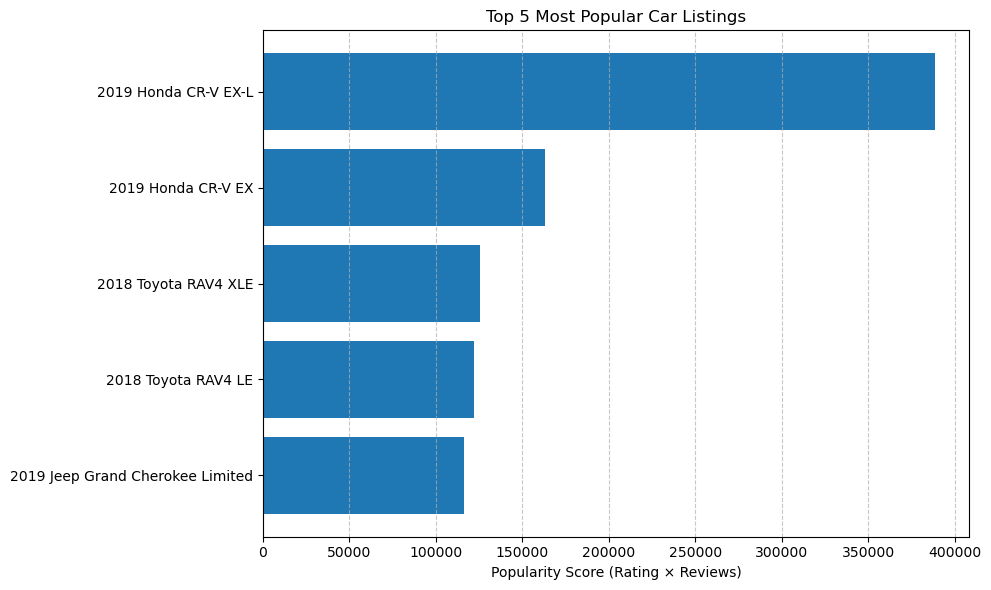

In [6]:
import matplotlib.pyplot as plt

# Step 1: Get Top 5 most popular cars
top5_popular = grouped.sort_values(by='PopularityScore', ascending=False).head(5)

# Step 2: Create labels (Year + Make + Model together for clarity)
top5_popular['CarName'] = top5_popular['Year'].astype(str) + ' ' + top5_popular['Make'] + ' ' + top5_popular['Model']

# Step 3: Plot
plt.figure(figsize=(10,6))
plt.barh(top5_popular['CarName'], top5_popular['PopularityScore'])
plt.gca().invert_yaxis()  # Highest score at the top
plt.xlabel('Popularity Score (Rating × Reviews)')
plt.title('Top 5 Most Popular Car Listings')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


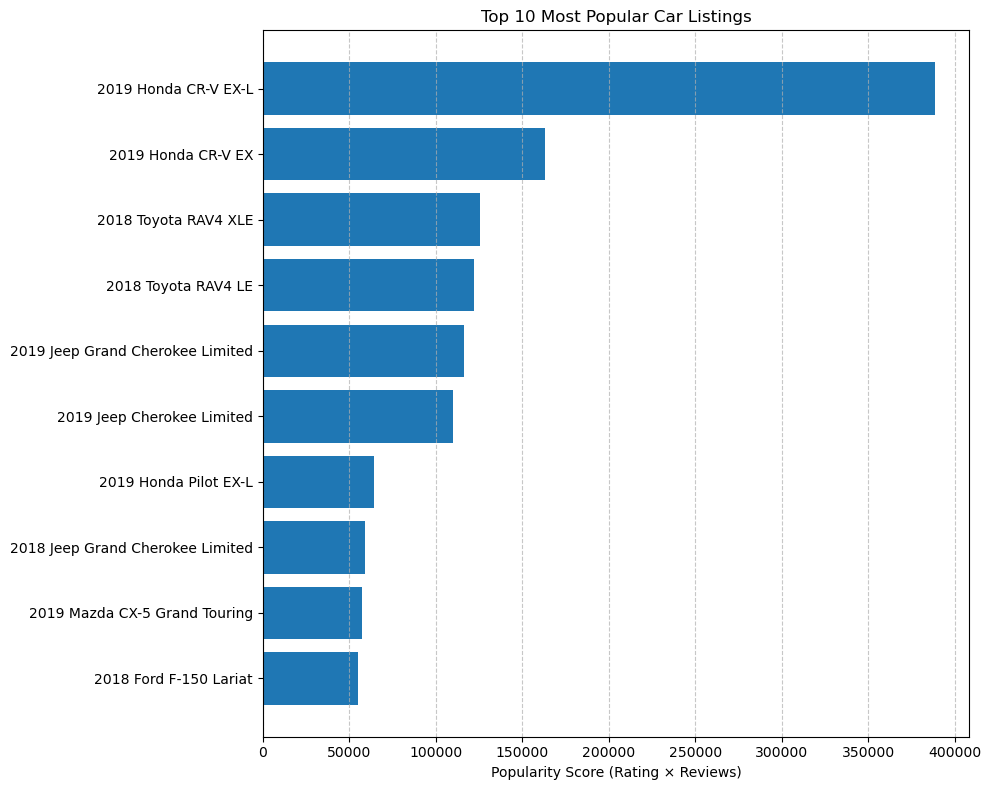

In [16]:
import matplotlib.pyplot as plt

# Step 1: Get Top 10 most popular cars
top10_popular = grouped.sort_values(by='PopularityScore', ascending=False).head(10)

# Step 2: Create labels (Year + Make + Model together for clarity)
top10_popular['CarName'] = top10_popular['Year'].astype(str) + ' ' + top10_popular['Make'] + ' ' + top10_popular['Model']

# Step 3: Plot
plt.figure(figsize=(10,8))
plt.barh(top10_popular['CarName'], top10_popular['PopularityScore'])
plt.gca().invert_yaxis()  # Highest score at the top
plt.xlabel('Popularity Score (Rating × Reviews)')
plt.title('Top 10 Most Popular Car Listings')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


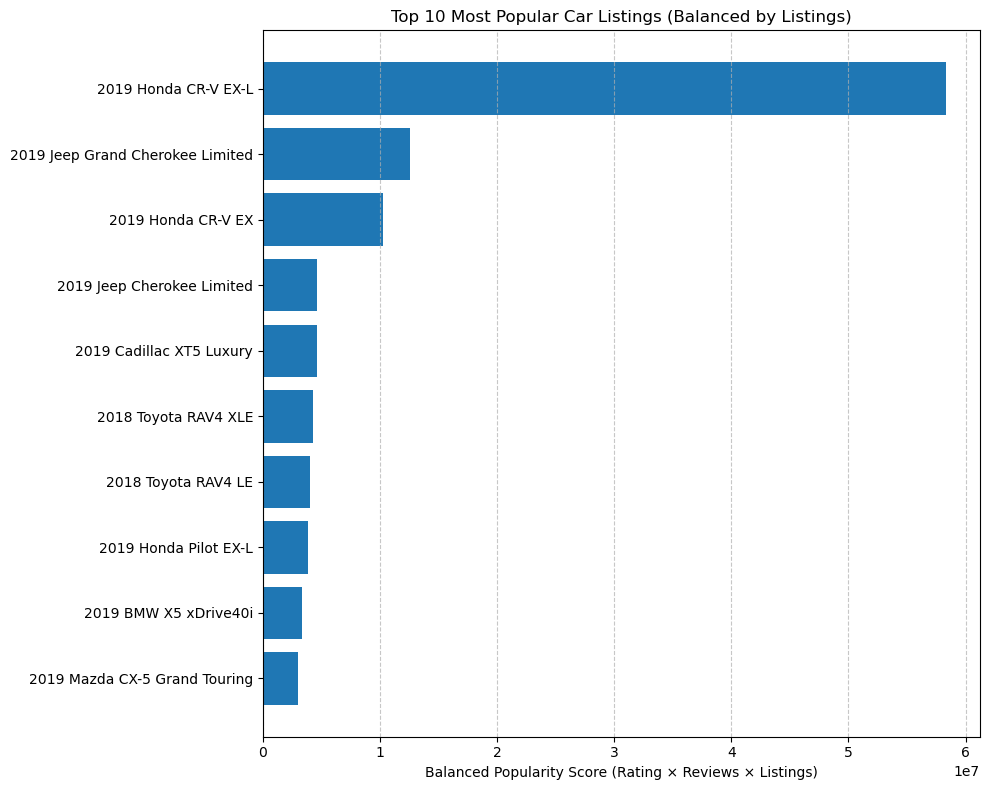

In [18]:
# Step 1: Group by Year, Make, Model and calculate stats
grouped = df.groupby(['Year', 'Make', 'Model']).agg({
    'PopularityScore': 'sum',            # Ratings × Reviews (previous definition)
    'ConsumerRating': 'mean',
    'ConsumerReviews': 'sum',
    'Price': 'mean',
    'Mileage': 'mean',
    'VIN': 'count'                        # <-- VIN is unique, so counting VIN = how many listings
}).reset_index()

# Step 2: Rename VIN count to Listings
grouped = grouped.rename(columns={'VIN': 'Listings'})

# Step 3: Create a New Balanced Popularity Score
# New Idea: Popularity Score × Listings
grouped['BalancedPopularityScore'] = grouped['PopularityScore'] * grouped['Listings']

# Step 4: Sort by the new Balanced Popularity Score
top10_balanced = grouped.sort_values(by='BalancedPopularityScore', ascending=False).head(10)

# Step 5: Prepare for plotting
top10_balanced['CarName'] = top10_balanced['Year'].astype(str) + ' ' + top10_balanced['Make'] + ' ' + top10_balanced['Model']

# Step 6: Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.barh(top10_balanced['CarName'], top10_balanced['BalancedPopularityScore'])
plt.gca().invert_yaxis()
plt.xlabel('Balanced Popularity Score (Rating × Reviews × Listings)')
plt.title('Top 10 Most Popular Car Listings (Balanced by Listings)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


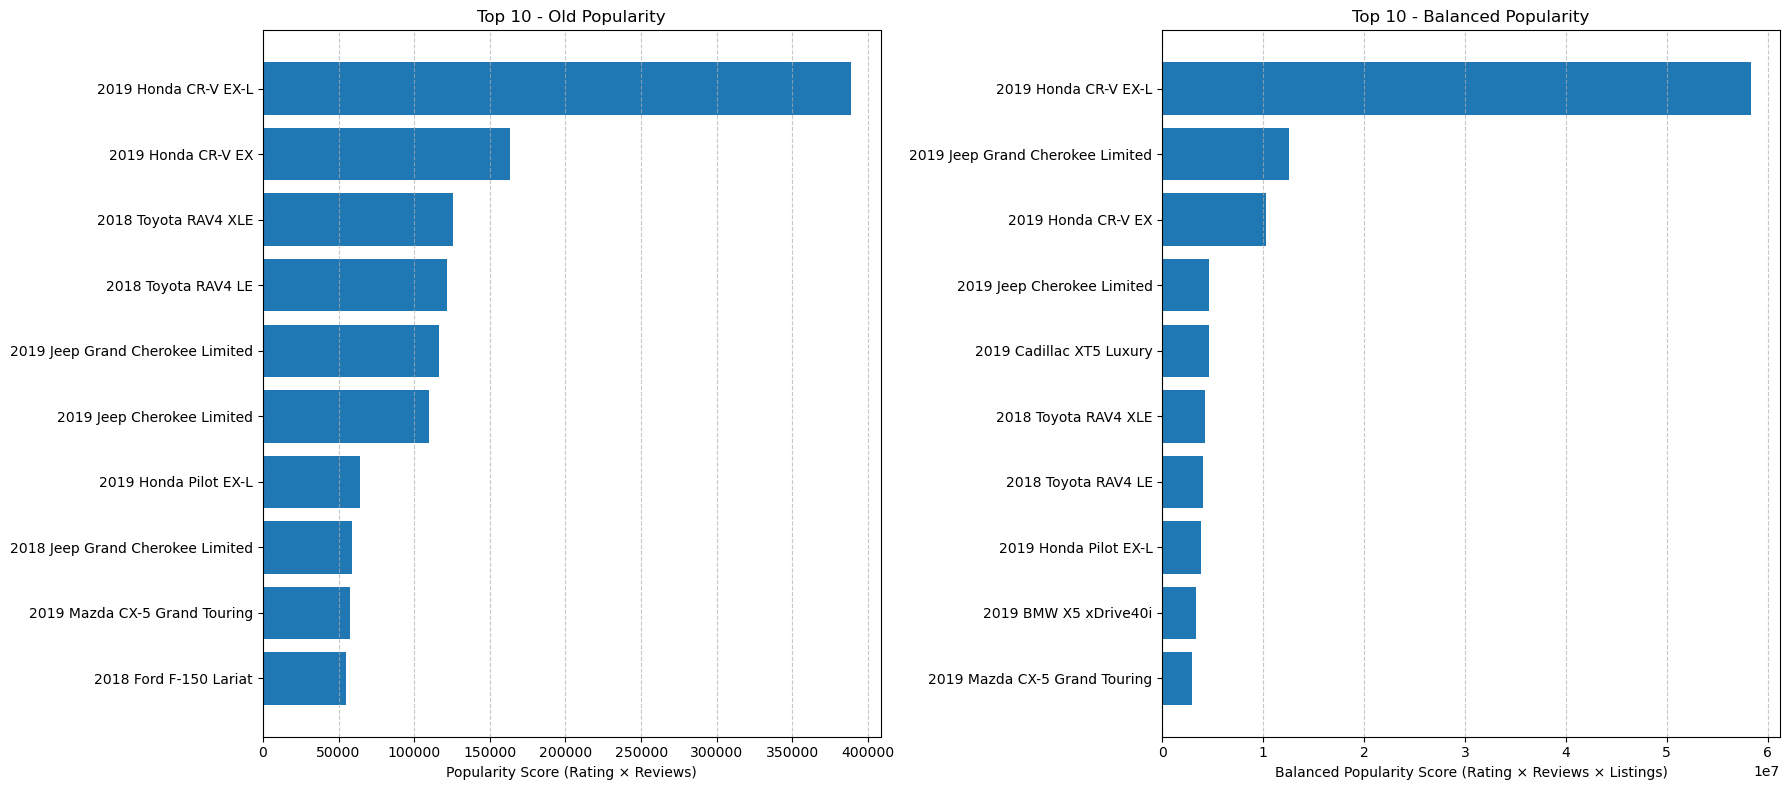

In [20]:
# Step 1: Group the data again cleanly
grouped = df.groupby(['Year', 'Make', 'Model']).agg({
    'PopularityScore': 'sum',             # old score: rating × reviews
    'ConsumerRating': 'mean',
    'ConsumerReviews': 'sum',
    'Price': 'mean',
    'Mileage': 'mean',
    'VIN': 'count'                         # VIN count = how many times listed
}).reset_index()

# Step 2: Rename VIN to Listings
grouped = grouped.rename(columns={'VIN': 'Listings'})

# Step 3: Create a new Balanced Popularity Score
grouped['BalancedPopularityScore'] = grouped['PopularityScore'] * grouped['Listings']

# Step 4: Create CarName for labeling
grouped['CarName'] = grouped['Year'].astype(str) + ' ' + grouped['Make'] + ' ' + grouped['Model']

# Step 5: Get Top 10 for both old and new scores
top10_old = grouped.sort_values(by='PopularityScore', ascending=False).head(10)
top10_new = grouped.sort_values(by='BalancedPopularityScore', ascending=False).head(10)

# Step 6: Set up side-by-side plots
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Old Popularity
axes[0].barh(top10_old['CarName'], top10_old['PopularityScore'])
axes[0].invert_yaxis()
axes[0].set_xlabel('Popularity Score (Rating × Reviews)')
axes[0].set_title('Top 10 - Old Popularity')
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# New Balanced Popularity
axes[1].barh(top10_new['CarName'], top10_new['BalancedPopularityScore'])
axes[1].invert_yaxis()
axes[1].set_xlabel('Balanced Popularity Score (Rating × Reviews × Listings)')
axes[1].set_title('Top 10 - Balanced Popularity')
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [22]:
df

Year     Make                   Model Used/New    Price  ConsumerRating  \
1     2018     Ford            F-150 Lariat     Used  49985.0             4.8   
2     2017      RAM            1500 Laramie     Used  41860.0             4.7   
3     2021    Honda         Accord Sport SE     Used  28500.0             5.0   
4     2020    Lexus                  RX 350     Used  49000.0             4.8   
5     2012   Toyota             4Runner SR5     Used  23541.0             4.7   
...    ...      ...                     ...      ...      ...             ...   
9374  2019   Subaru  Crosstrek 2.0i Premium     Used  27374.0             4.7   
9375  2019     Audi         Q8 3.0T Premium     Used  61998.0             4.8   
9376  2017    Buick         Enclave Leather     Used  26944.0             4.8   
9377  2019   Subaru        Forester Premium     Used  28568.0             4.7   
9378  2019  Hyundai   Santa Fe Ultimate 2.4     Used  32091.0             4.8   

      ConsumerReviews SellerType                          SellerName  \
1                 817     Dealer                     Giant Chevrolet   
2                 495     Dealer              Gill Auto Group Madera   
3                  36     Dealer                 AutoSavvy Las Vegas   
4                  76     Dealer                  Lexus of Henderson   
5                  34     Dealer           AutoNation Toyota Hayward   
...               ...        ...                                 ...   
9374              205     Dealer  Bertera Subaru of West Springfield   
9375               27     Dealer            Autobahn USA Westborough   
9376              137     Dealer             Tulley Automotive Group   
9377              279     Dealer                          Ira Subaru   
9378              204     Dealer                    Route 44 Hyundai   

      SellerRating  ...         Drivetrain MinMPG MaxMPG  FuelType  \
1              4.8  ...   Four-wheel Drive     19     24  Gasoline   
2              4.6  ...   Four-wheel Drive     15     21  Gasoline   
3              4.6  ...  Front-wheel Drive     29     35  Gasoline   
4              4.8  ...  Front-wheel Drive     20     27  Gasoline   
5              4.4  ...   Rear-wheel Drive     17     23  Gasoline   
...            ...  ...                ...    ...    ...       ...   
9374           4.4  ...    All-wheel Drive     27     33  Gasoline   
9375           4.8  ...    All-wheel Drive     17     22    Hybrid   
9376           4.7  ...    All-wheel Drive     15     22  Gasoline   
9377           4.4  ...    All-wheel Drive     26     33  Gasoline   
9378           4.4  ...    All-wheel Drive     21     27  Gasoline   

            Transmission                             Engine  \
1     10-Speed Automatic    3.5L V6 24V PDI DOHC Twin Turbo   
2      8-Speed Automatic               5.7L V8 16V MPFI OHV   
3          Automatic CVT         1.5L I4 16V GDI DOHC Turbo   
4      8-Speed Automatic               3.5L V6 24V PDI DOHC   
5      5-Speed Automatic              4.0L V6 24V MPFI DOHC   
...                  ...                                ...   
9374       Automatic CVT               2.0L H4 16V GDI DOHC   
9375   8-Speed Automatic  3.0L V6 24V GDI DOHC Turbo Hybrid   
9376   6-Speed Automatic               3.6L V6 24V GDI DOHC   
9377       Automatic CVT               2.5L H4 16V GDI DOHC   
9378   8-Speed Automatic               2.4L I4 16V GDI DOHC   

                    VIN     Stock#  Mileage  PopularityScore  
1     1FTEW1EG2JFD44217     22418A    32929           3921.6  
2     1C6RR7VT5HS842283  NG277871G    23173           2326.5  
3     1HGCV1F49MA038035      54237    10598            180.0  
4     2T2AZMAA8LC156270   HDT4181A    28137            364.8  
5     JTEZU5JR3C5043790   C5043790   105469            159.8  
...                 ...        ...      ...              ...  
9374  JF2GTADC4KH318032    220502A    15606            963.5  
9375  WA1AVAF14KD015389     AB4719    46855            129.6  
937

In [26]:
# Step 1: Pick the top car
# (use the most popular Year + Make + Model you already found)

top_car = top10_models.iloc[0]  # First row is the most popular
year = top_car['Year']
make = top_car['Make']
model = top_car['Model']

# Step 2: Filter the original df to only listings matching the top car
top_car_listings = df[(df['Year'] == year) & (df['Make'] == make) & (df['Model'] == model)]

# Step 3: Explore the variations
# See unique counts in important features
important_columns = ['FuelType', 'Transmission', 'Drivetrain', 'ExteriorColor', 'InteriorColor', 'Engine']

variation_in_top_car = top_car_listings[important_columns].nunique()

# Step 4: See it
print(f"Feature variations in {year} {make} {model}:")
print(variation_in_top_car)



Feature variations in 2019 Honda CR-V EX-L:
FuelType          1
Transmission      3
Drivetrain        2
ExteriorColor    18
InteriorColor     5
Engine            3
dtype: int64


In [28]:
# Step 1: Group the top car's listings by InteriorColor, Engine, and Transmission
group_features = ['InteriorColor', 'Engine', 'Transmission']

top_car_summary = top_car_listings.groupby(group_features).agg({
    'Price': 'mean',
    'Mileage': 'mean',
    'ConsumerRating': 'mean',
    'VIN': 'count'  # VIN is unique per car
}).reset_index()

# Step 2: Rename columns for clarity
top_car_summary = top_car_summary.rename(columns={'VIN': 'NumberOfListings'})

# Step 3: Display the summary
print(f"Breakdown of variations inside {year} {make} {model}:")
print(top_car_summary)


Breakdown of variations inside 2019 Honda CR-V EX-L:
  InteriorColor                                           Engine  \
0         Black                       1.5L I4 16V GDI DOHC Turbo   
1         Black                                4 Cylinder Engine   
2         Black  Intercooled Turbo Regular Unleaded I-4 1.5 L/91   
3          Gray                       1.5L I4 16V GDI DOHC Turbo   
4          Gray  Intercooled Turbo Regular Unleaded I-4 1.5 L/91   
5         Ivory                       1.5L I4 16V GDI DOHC Turbo   
6         Ivory  Intercooled Turbo Regular Unleaded I-4 1.5 L/91   
7           Tan                       1.5L I4 16V GDI DOHC Turbo   
8             –                       1.5L I4 16V GDI DOHC Turbo   

                         Transmission         Price       Mileage  \
0                       Automatic CVT  32100.783333  29841.866667   
1  continuously variable w/sport mode  31392.000000  36432.000000   
2                            Variable  33258.333333  24303.

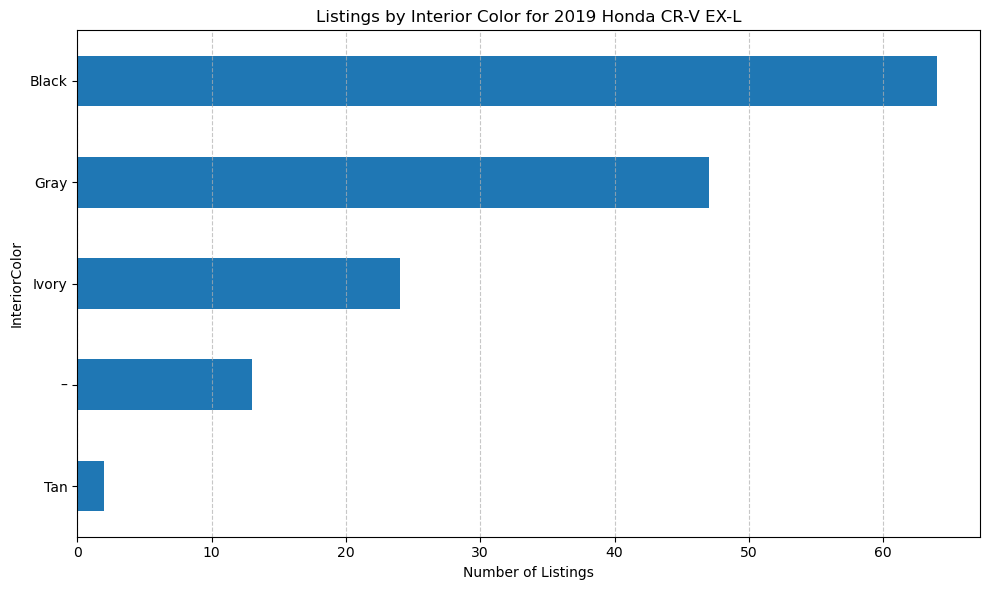

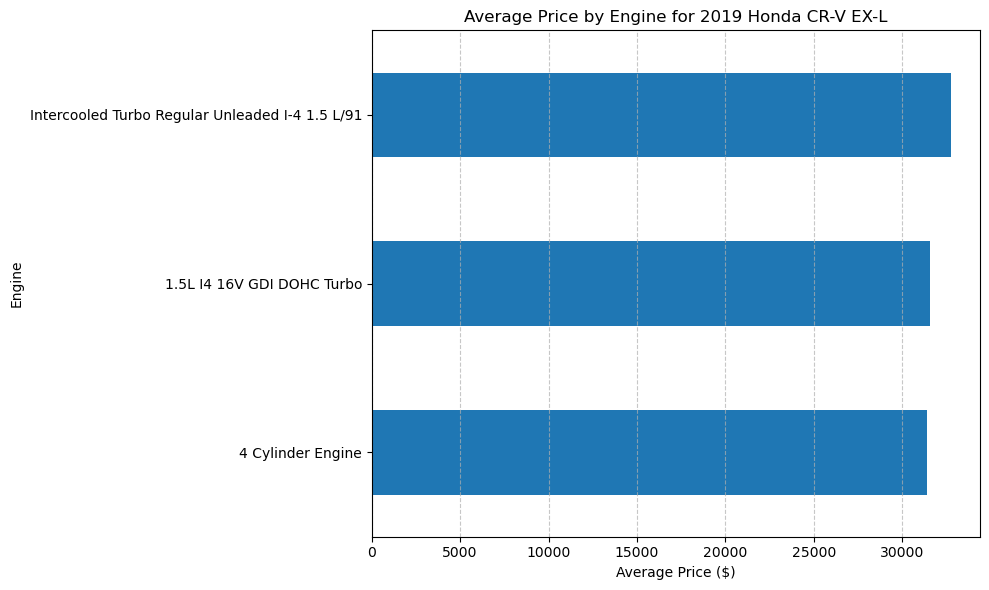

In [30]:
import matplotlib.pyplot as plt

# Plot 1: Number of Listings by InteriorColor
plt.figure(figsize=(10,6))
top_car_summary.groupby('InteriorColor')['NumberOfListings'].sum().sort_values().plot(kind='barh')
plt.xlabel('Number of Listings')
plt.title(f'Listings by Interior Color for {year} {make} {model}')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: Average Price by Engine
plt.figure(figsize=(10,6))
top_car_summary.groupby('Engine')['Price'].mean().sort_values().plot(kind='barh')
plt.xlabel('Average Price ($)')
plt.title(f'Average Price by Engine for {year} {make} {model}')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [34]:
# Step 1: Group by InteriorColor, Engine, Transmission
group_features = ['InteriorColor', 'Engine', 'Transmission']

# Step 2: Aggregate the features you want
variation_details = top_car_listings.groupby(group_features).agg({
    'ConsumerRating': 'mean',        # Average rating
    'ConsumerReviews': 'mean',        # Average number of reviews
    'VIN': 'count'                    # Number of listings
}).reset_index()

# Step 3: Rename VIN count
variation_details = variation_details.rename(columns={'VIN': 'ListingsCount'})

# Step 4: Create new calculated columns
variation_details['RatingTimesReviews'] = variation_details['ConsumerRating'] * variation_details['ConsumerReviews']
variation_details['RatingTimesReviewsTimesListings'] = variation_details['RatingTimesReviews'] * variation_details['ListingsCount']

# Step 5: See the final dataframe
print(f"Variation breakdown with full popularity scores for {year} {make} {model}:")
print(variation_details)


Variation breakdown with full popularity scores for 2019 Honda CR-V EX-L:
  InteriorColor                                           Engine  \
0         Black                       1.5L I4 16V GDI DOHC Turbo   
1         Black                                4 Cylinder Engine   
2         Black  Intercooled Turbo Regular Unleaded I-4 1.5 L/91   
3          Gray                       1.5L I4 16V GDI DOHC Turbo   
4          Gray  Intercooled Turbo Regular Unleaded I-4 1.5 L/91   
5         Ivory                       1.5L I4 16V GDI DOHC Turbo   
6         Ivory  Intercooled Turbo Regular Unleaded I-4 1.5 L/91   
7           Tan                       1.5L I4 16V GDI DOHC Turbo   
8             –                       1.5L I4 16V GDI DOHC Turbo   

                         Transmission  ConsumerRating  ConsumerReviews  \
0                       Automatic CVT             4.8            540.0   
1  continuously variable w/sport mode             4.8            540.0   
2                      

In [36]:
# Step 6: Sort variations by Rating × Reviews × Listings, highest to lowest
variation_details_sorted = variation_details.sort_values(by='RatingTimesReviewsTimesListings', ascending=False)

# Step 7: Display the sorted table
print(f"Top variations for {year} {make} {model} based on total popularity impact:")
print(variation_details_sorted)


Top variations for 2019 Honda CR-V EX-L based on total popularity impact:
  InteriorColor                                           Engine  \
0         Black                       1.5L I4 16V GDI DOHC Turbo   
3          Gray                       1.5L I4 16V GDI DOHC Turbo   
5         Ivory                       1.5L I4 16V GDI DOHC Turbo   
8             –                       1.5L I4 16V GDI DOHC Turbo   
2         Black  Intercooled Turbo Regular Unleaded I-4 1.5 L/91   
6         Ivory  Intercooled Turbo Regular Unleaded I-4 1.5 L/91   
4          Gray  Intercooled Turbo Regular Unleaded I-4 1.5 L/91   
7           Tan                       1.5L I4 16V GDI DOHC Turbo   
1         Black                                4 Cylinder Engine   

                         Transmission  ConsumerRating  ConsumerReviews  \
0                       Automatic CVT             4.8            540.0   
3                       Automatic CVT             4.8            540.0   
5                      

C:\Users\patron\AppData\Local\Temp\ipykernel_24652\2818142447.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_variations['VariationLabel'] = (


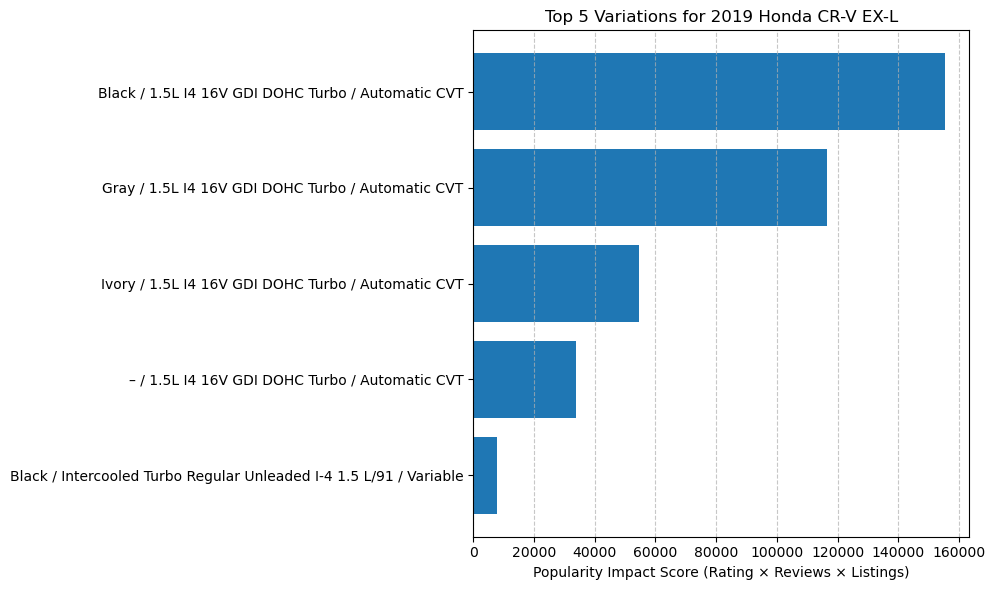

In [38]:
import matplotlib.pyplot as plt

# Step 1: Select the Top 5 variations
top5_variations = variation_details_sorted.head(5)

# Step 2: Create a readable label combining InteriorColor, Engine, Transmission
top5_variations['VariationLabel'] = (
    top5_variations['InteriorColor'] + ' / ' +
    top5_variations['Engine'] + ' / ' +
    top5_variations['Transmission']
)

# Step 3: Plot
plt.figure(figsize=(10,6))
plt.barh(top5_variations['VariationLabel'], top5_variations['RatingTimesReviewsTimesListings'])
plt.gca().invert_yaxis()  # So the highest is on top
plt.xlabel('Popularity Impact Score (Rating × Reviews × Listings)')
plt.title(f'Top 5 Variations for {year} {make} {model}')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [51]:
top_car = top10_models.iloc[1]  # Second row is the most popular
year = top_car['Year']
make = top_car['Make']
model = top_car['Model']

# Step 2: Filter the original df to only listings matching the top car
top_car_listings = df[(df['Year'] == year) & (df['Make'] == make) & (df['Model'] == model)]

# Step 3: Explore the variations
# See unique counts in important features
important_columns = ['FuelType', 'Transmission', 'Drivetrain', 'ExteriorColor', 'InteriorColor', 'Engine']

variation_in_top_car = top_car_listings[important_columns].nunique()

# Step 4: See it
print(f"Feature variations in {year} {make} {model}:")
print(variation_in_top_car)

Feature variations in 2019 Honda CR-V EX:
FuelType          1
Transmission      3
Drivetrain        2
ExteriorColor    20
InteriorColor     4
Engine            3
dtype: int64


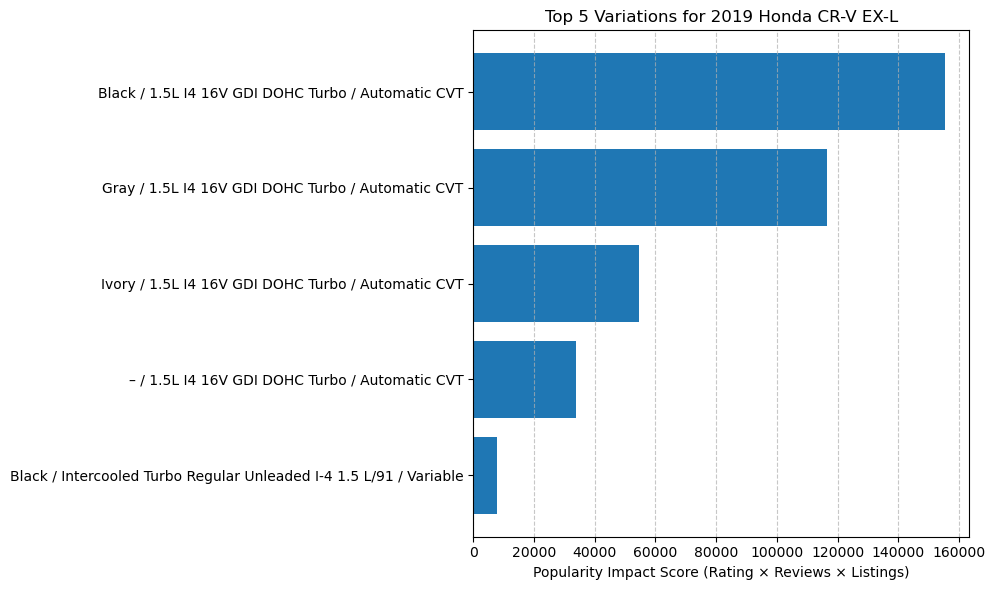

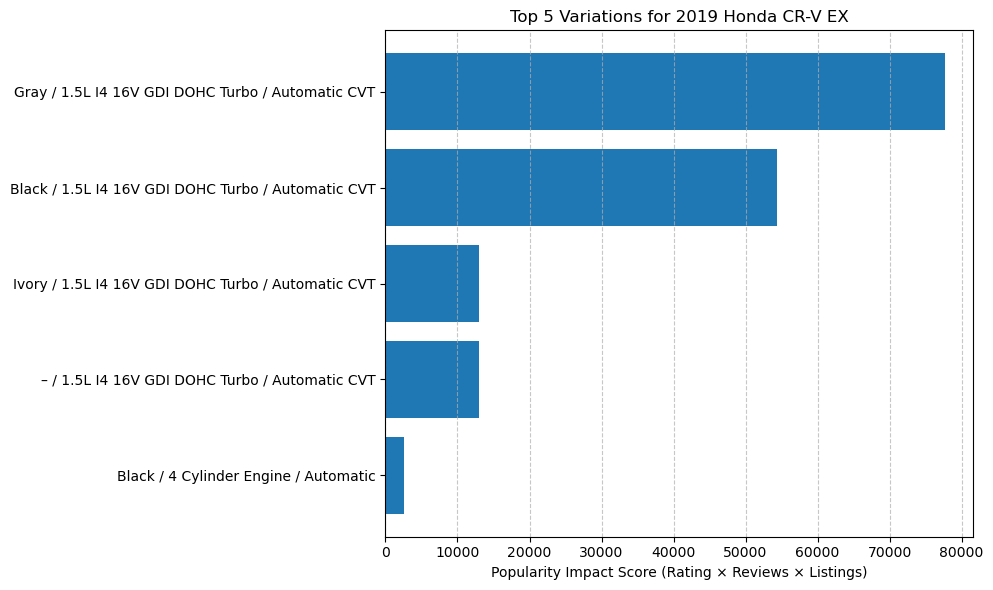

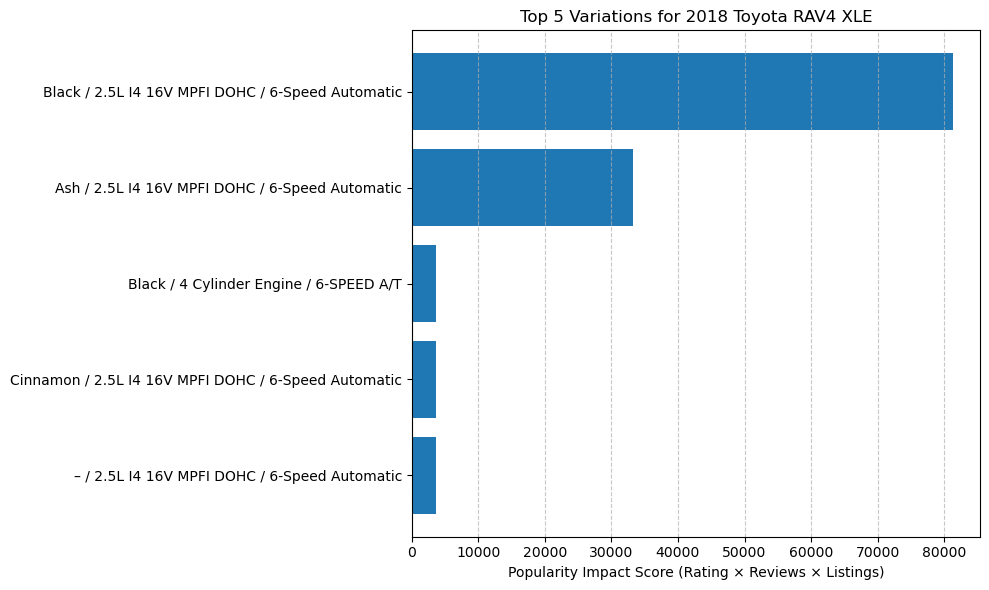

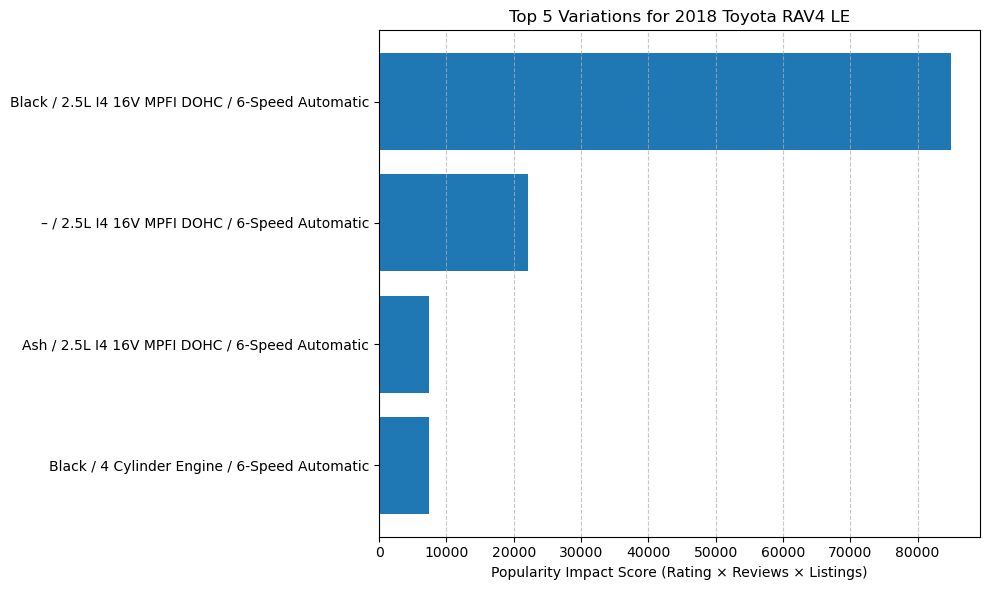

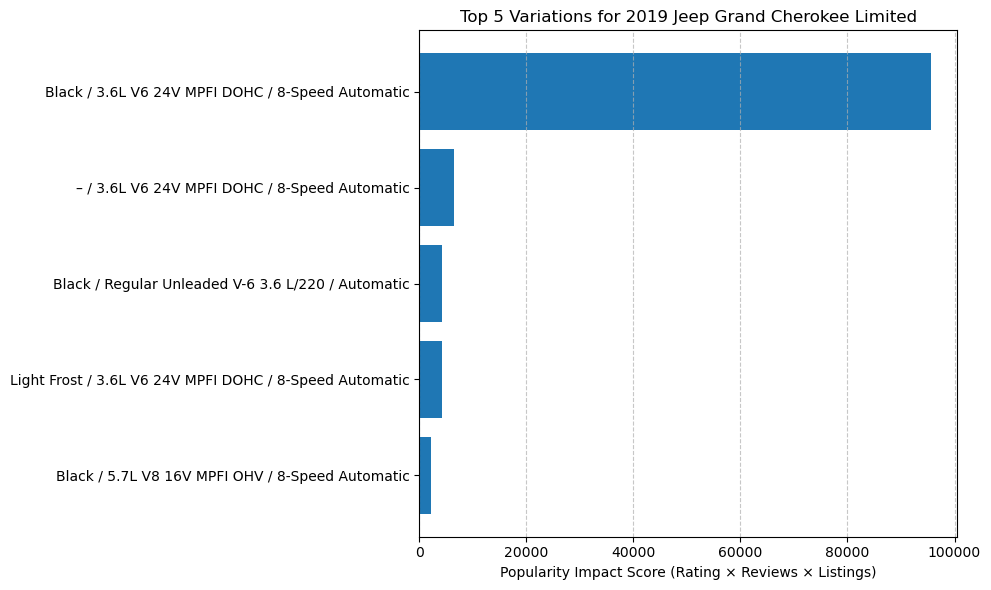

In [55]:
# Group by Transmission inside the top car listings
price_by_transmission = top_car_listings.groupby('Transmission').agg({
    'Price': 'mean',
    'Mileage': 'mean',
    'VIN': 'count'  # How many listings for each Transmission type
}).reset_index()

# Rename for clarity
price_by_transmission = price_by_transmission.rename(columns={'VIN': 'ListingsCount'})

# See the results
print(f"Average Price and Mileage by Transmission for {year} {make} {model}:")
print(price_by_transmission)


Average Price and Mileage by Transmission for 2019 Honda CR-V EX:
    Transmission         Price      Mileage  ListingsCount
0      Automatic  29495.000000  37246.00000              1
1  Automatic CVT  30262.754098  30112.42623             61
2       Variable  31872.000000  12947.00000              1


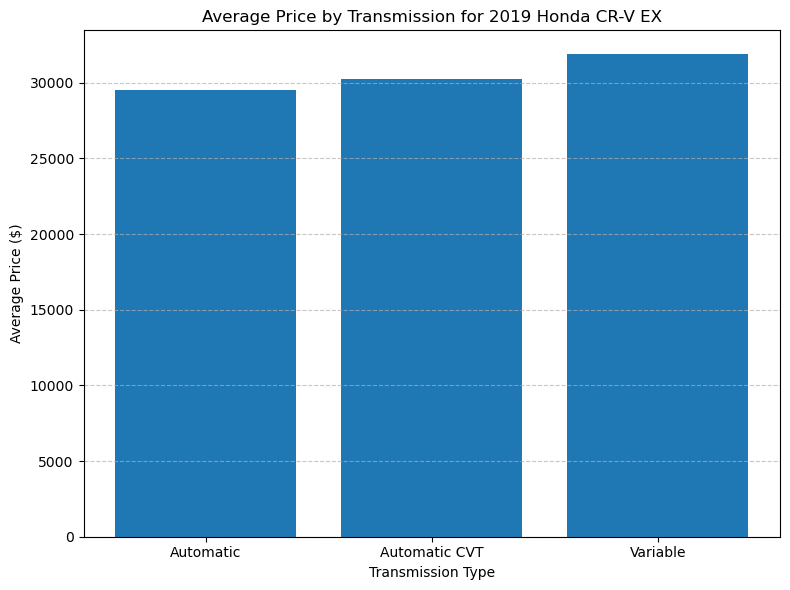

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.bar(price_by_transmission['Transmission'], price_by_transmission['Price'])
plt.xlabel('Transmission Type')
plt.ylabel('Average Price ($)')
plt.title(f'Average Price by Transmission for {year} {make} {model}')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Feature variations in 2019 Honda CR-V EX:
FuelType          1
Transmission      3
Drivetrain        2
ExteriorColor    20
InteriorColor     4
Engine            3
dtype: int64
Average Price and Mileage by Transmission for 2019 Honda CR-V EX:
    Transmission         Price      Mileage  ListingsCount
0      Automatic  29495.000000  37246.00000              1
1  Automatic CVT  30262.754098  30112.42623             61
2       Variable  31872.000000  12947.00000              1


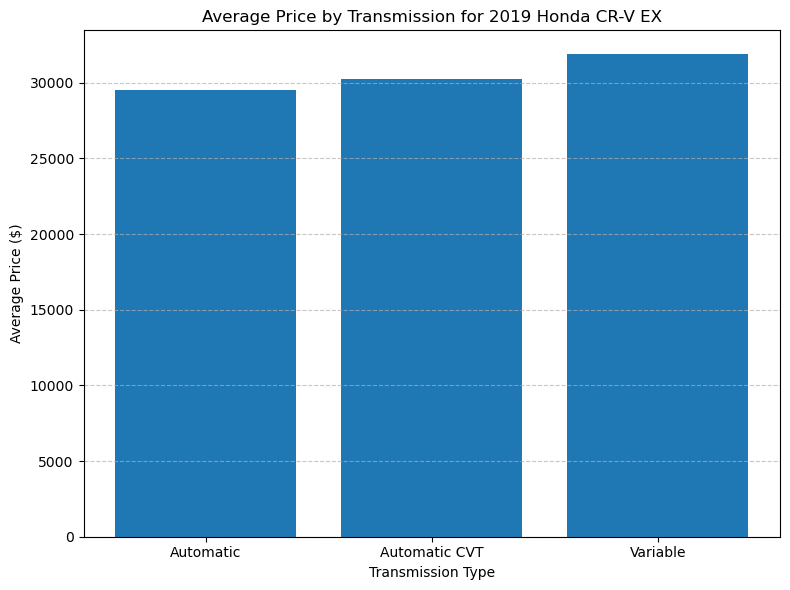

In [59]:
# Now work with second top car
top_car_2 = top10_models.iloc[1]  # Second row
year2 = top_car_2['Year']
make2 = top_car_2['Make']
model2 = top_car_2['Model']

# Filter original df
top_car2_listings = df[(df['Year'] == year2) & (df['Make'] == make2) & (df['Model'] == model2)]

# --- Explore Feature Variations ---
important_columns = ['FuelType', 'Transmission', 'Drivetrain', 'ExteriorColor', 'InteriorColor', 'Engine']
variation_in_top_car2 = top_car2_listings[important_columns].nunique()

print(f"Feature variations in {year2} {make2} {model2}:")
print(variation_in_top_car2)

# --- Group by Transmission: Price & Mileage ---
price_by_transmission2 = top_car2_listings.groupby('Transmission').agg({
    'Price': 'mean',
    'Mileage': 'mean',
    'VIN': 'count'
}).reset_index()

price_by_transmission2 = price_by_transmission2.rename(columns={'VIN': 'ListingsCount'})

print(f"Average Price and Mileage by Transmission for {year2} {make2} {model2}:")
print(price_by_transmission2)

# --- Plot Transmission vs Price for Second Car ---
plt.figure(figsize=(8,6))
plt.bar(price_by_transmission2['Transmission'], price_by_transmission2['Price'])
plt.xlabel('Transmission Type')
plt.ylabel('Average Price ($)')
plt.title(f'Average Price by Transmission for {year2} {make2} {model2}')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [61]:
import numpy as np

# Step 1: Make sure 'grouped' has the right fields
# (grouped should already be your data grouped by Year, Make, Model)
# We assume it already has these columns:
# ['ConsumerRating', 'ConsumerReviews', 'Listings', 'PopularityScore']

# Step 2: Create a new column for the square root of Listings
grouped['SqrtListings'] = np.sqrt(grouped['Listings'])

# Step 3: Calculate the Square Root Adjusted Popularity Score
grouped['PopularityScore_SqrtAdjusted'] = (
    grouped['ConsumerRating'] * 
    grouped['ConsumerReviews'] * 
    grouped['SqrtListings']
)

# Step 4: Sort the cars by the new adjusted popularity score
grouped_sorted_sqrt = grouped.sort_values(by='PopularityScore_SqrtAdjusted', ascending=False)

# Step 5: Display Top 10 based on the adjusted score
print("Top 10 cars based on Square Root Listings Adjusted Popularity Score:")
print(grouped_sorted_sqrt[['Year', 'Make', 'Model', 'PopularityScore_SqrtAdjusted']].head(10))


Top 10 cars based on Square Root Listings Adjusted Popularity Score:
      Year      Make                   Model  PopularityScore_SqrtAdjusted
1336  2019     Honda               CR-V EX-L                  4.761808e+06
1335  2019     Honda                 CR-V EX                  1.296122e+06
1390  2019      Jeep  Grand Cherokee Limited                  1.206771e+06
1144  2018    Toyota                RAV4 XLE                  7.327407e+05
1384  2019      Jeep        Cherokee Limited                  7.111809e+05
1141  2018    Toyota                 RAV4 LE                  7.006528e+05
1350  2019     Honda              Pilot EX-L                  4.974770e+05
1252  2019  Cadillac              XT5 Luxury                  4.520032e+05
1467  2019     Mazda      CX-5 Grand Touring                  4.139750e+05
1023  2018      Jeep  Grand Cherokee Limited                  3.272509e+05


C:\Users\patron\AppData\Local\Temp\ipykernel_24652\3008071345.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_sqrt_adjusted['CarLabel'] = (


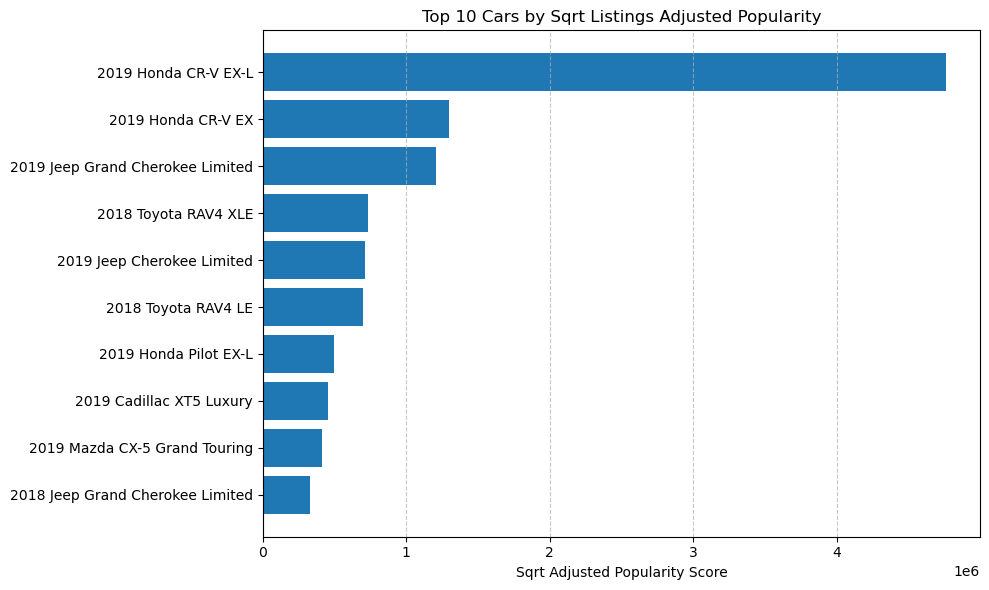

In [63]:
import matplotlib.pyplot as plt

# Step 1: Select Top 10 based on Sqrt Adjusted Popularity
top10_sqrt_adjusted = grouped_sorted_sqrt.head(10)

# Step 2: Create a clean label
top10_sqrt_adjusted['CarLabel'] = (
    top10_sqrt_adjusted['Year'].astype(str) + ' ' +
    top10_sqrt_adjusted['Make'] + ' ' +
    top10_sqrt_adjusted['Model']
)

# Step 3: Plot
plt.figure(figsize=(10,6))
plt.barh(top10_sqrt_adjusted['CarLabel'], top10_sqrt_adjusted['PopularityScore_SqrtAdjusted'])
plt.gca().invert_yaxis()  # Highest at the top
plt.xlabel('Sqrt Adjusted Popularity Score')
plt.title('Top 10 Cars by Sqrt Listings Adjusted Popularity')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [65]:
# Step 4: Create a simple comparison table
comparison_table = grouped[['Year', 'Make', 'Model', 'PopularityScore', 'PopularityScore_SqrtAdjusted']]

# Step 5: Sort by original PopularityScore for comparison
comparison_table = comparison_table.sort_values(by='PopularityScore', ascending=False).head(10)

# Step 6: Display
print("Comparison of Old Popularity Score vs. Sqrt Adjusted Popularity Score (Top 10 by Old Score):")
print(comparison_table)


Comparison of Old Popularity Score vs. Sqrt Adjusted Popularity Score (Top 10 by Old Score):
      Year    Make                   Model  PopularityScore  \
1336  2019   Honda               CR-V EX-L         388800.0   
1335  2019   Honda                 CR-V EX         163296.0   
1144  2018  Toyota                RAV4 XLE         125664.0   
1141  2018  Toyota                 RAV4 LE         121968.0   
1390  2019    Jeep  Grand Cherokee Limited         116121.6   
1384  2019    Jeep        Cherokee Limited         109737.6   
1350  2019   Honda              Pilot EX-L          64224.0   
1023  2018    Jeep  Grand Cherokee Limited          58776.0   
1467  2019   Mazda      CX-5 Grand Touring          57408.0   
969   2018    Ford            F-150 Lariat          54902.4   

      PopularityScore_SqrtAdjusted  
1336                  4.761808e+06  
1335                  1.296122e+06  
1144                  7.327407e+05  
1141                  7.006528e+05  
1390                  1.2067

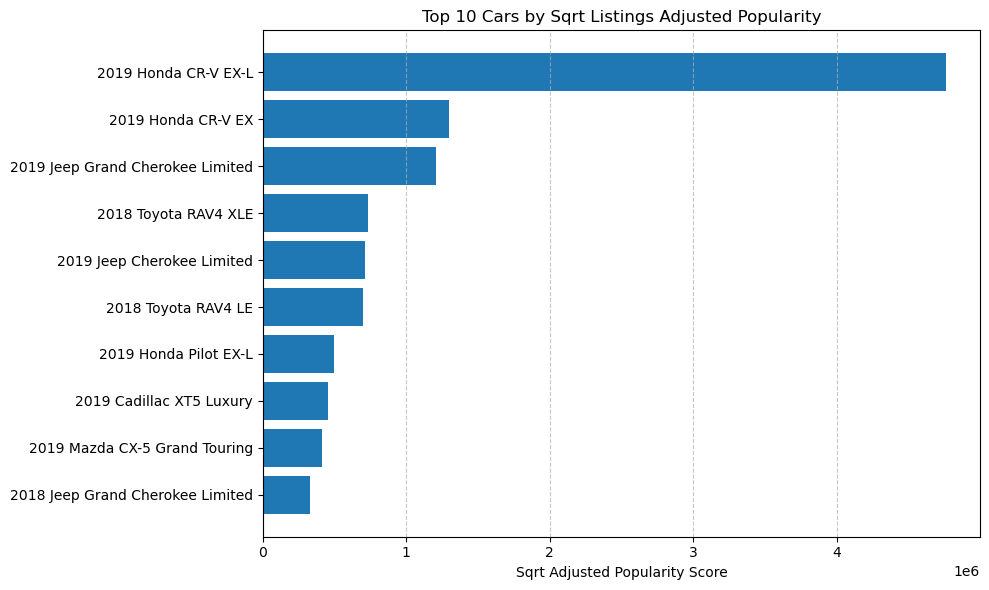

Top 10 cars based on Square Root Listings Adjusted Popularity Score:
      Year      Make                   Model  PopularityScore_SqrtAdjusted
1336  2019     Honda               CR-V EX-L                  4.761808e+06
1335  2019     Honda                 CR-V EX                  1.296122e+06
1390  2019      Jeep  Grand Cherokee Limited                  1.206771e+06
1144  2018    Toyota                RAV4 XLE                  7.327407e+05
1384  2019      Jeep        Cherokee Limited                  7.111809e+05
1141  2018    Toyota                 RAV4 LE                  7.006528e+05
1350  2019     Honda              Pilot EX-L                  4.974770e+05
1252  2019  Cadillac              XT5 Luxury                  4.520032e+05
1467  2019     Mazda      CX-5 Grand Touring                  4.139750e+05
1023  2018      Jeep  Grand Cherokee Limited                  3.272509e+05


In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Make sure we're working with the full grouped dataframe (not just top old cars)
# 'grouped' should have Year, Make, Model, ConsumerRating, ConsumerReviews, Listings

# Step 2: Create a new Square Root Listings column
grouped['SqrtListings'] = np.sqrt(grouped['Listings'])

# Step 3: Create the Square Root Adjusted Popularity Score
grouped['PopularityScore_SqrtAdjusted'] = (
    grouped['ConsumerRating'] * 
    grouped['ConsumerReviews'] * 
    grouped['SqrtListings']
)

# Step 4: Sort by Sqrt Adjusted Popularity Score across all cars
grouped_sorted_sqrt = grouped.sort_values(by='PopularityScore_SqrtAdjusted', ascending=False)

# Step 5: Select Top 10 cars based on the new Sqrt Adjusted Score
top10_sqrt_adjusted = grouped_sorted_sqrt.head(10).copy()

# Step 6: Create a readable label
top10_sqrt_adjusted['CarLabel'] = (
    top10_sqrt_adjusted['Year'].astype(str) + ' ' +
    top10_sqrt_adjusted['Make'] + ' ' +
    top10_sqrt_adjusted['Model']
)

# Step 7: Plot Top 10 based on Sqrt Adjusted Score
plt.figure(figsize=(10,6))
plt.barh(top10_sqrt_adjusted['CarLabel'], top10_sqrt_adjusted['PopularityScore_SqrtAdjusted'])
plt.gca().invert_yaxis()
plt.xlabel('Sqrt Adjusted Popularity Score')
plt.title('Top 10 Cars by Sqrt Listings Adjusted Popularity')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 8: Display Top 10 Table
print("Top 10 cars based on Square Root Listings Adjusted Popularity Score:")
print(top10_sqrt_adjusted[['Year', 'Make', 'Model', 'PopularityScore_SqrtAdjusted']])


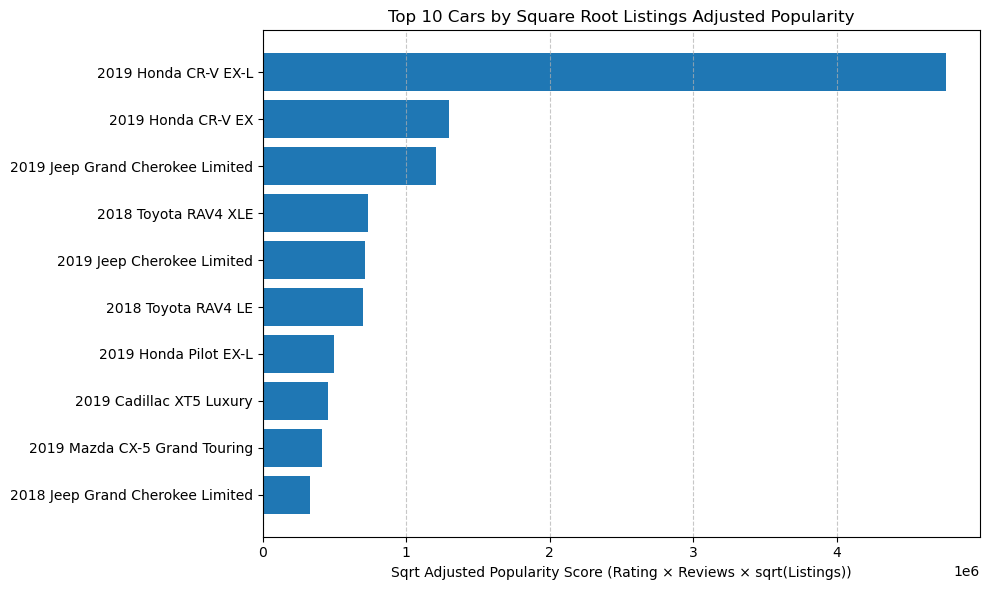

Top 10 cars based on Square Root Listings Adjusted Popularity Score:
      Year      Make                   Model  SqrtAdjustedScore
1336  2019     Honda               CR-V EX-L       4.761808e+06
1335  2019     Honda                 CR-V EX       1.296122e+06
1390  2019      Jeep  Grand Cherokee Limited       1.206771e+06
1144  2018    Toyota                RAV4 XLE       7.327407e+05
1384  2019      Jeep        Cherokee Limited       7.111809e+05
1141  2018    Toyota                 RAV4 LE       7.006528e+05
1350  2019     Honda              Pilot EX-L       4.974770e+05
1252  2019  Cadillac              XT5 Luxury       4.520032e+05
1467  2019     Mazda      CX-5 Grand Touring       4.139750e+05
1023  2018      Jeep  Grand Cherokee Limited       3.272509e+05


In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Make sure 'grouped' has the raw columns
# (ConsumerRating, ConsumerReviews, Listings)

# Step 2: Create a new Square Root of Listings column (fresh from Listings)
grouped['SqrtListings'] = np.sqrt(grouped['Listings'])

# Step 3: Create a new Sqrt Adjusted Popularity Score (fresh)
grouped['SqrtAdjustedScore'] = (
    grouped['ConsumerRating'] * 
    grouped['ConsumerReviews'] * 
    grouped['SqrtListings']
)

# Step 4: Sort the full dataset by the new SqrtAdjustedScore
grouped_sorted_sqrt = grouped.sort_values(by='SqrtAdjustedScore', ascending=False)

# Step 5: Select Top 10 based on the Sqrt Adjusted Score
top10_sqrt_adjusted = grouped_sorted_sqrt.head(10).copy()

# Step 6: Create readable labels
top10_sqrt_adjusted['CarLabel'] = (
    top10_sqrt_adjusted['Year'].astype(str) + ' ' +
    top10_sqrt_adjusted['Make'] + ' ' +
    top10_sqrt_adjusted['Model']
)

# Step 7: Plot
plt.figure(figsize=(10,6))
plt.barh(top10_sqrt_adjusted['CarLabel'], top10_sqrt_adjusted['SqrtAdjustedScore'])
plt.gca().invert_yaxis()
plt.xlabel('Sqrt Adjusted Popularity Score (Rating × Reviews × sqrt(Listings))')
plt.title('Top 10 Cars by Square Root Listings Adjusted Popularity')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 8: Print Top 10
print("Top 10 cars based on Square Root Listings Adjusted Popularity Score:")
print(top10_sqrt_adjusted[['Year', 'Make', 'Model', 'SqrtAdjustedScore']])


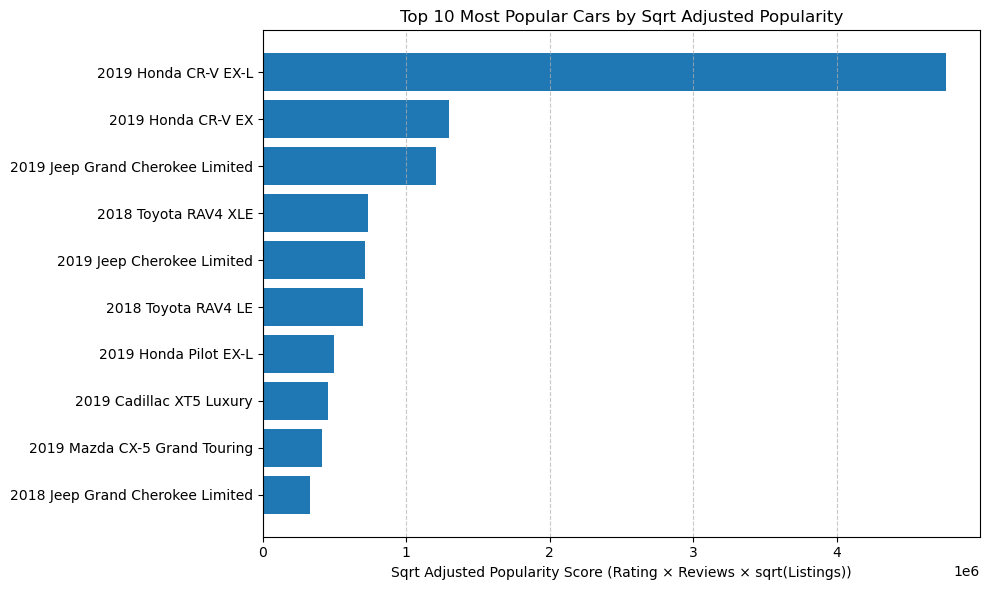

Top 10 Cars by Square Root Listings Adjusted Popularity Score:
      Year      Make                   Model  SqrtAdjustedPopularity
1336  2019     Honda               CR-V EX-L            4.761808e+06
1335  2019     Honda                 CR-V EX            1.296122e+06
1390  2019      Jeep  Grand Cherokee Limited            1.206771e+06
1144  2018    Toyota                RAV4 XLE            7.327407e+05
1384  2019      Jeep        Cherokee Limited            7.111809e+05
1141  2018    Toyota                 RAV4 LE            7.006528e+05
1350  2019     Honda              Pilot EX-L            4.974770e+05
1252  2019  Cadillac              XT5 Luxury            4.520032e+05
1467  2019     Mazda      CX-5 Grand Touring            4.139750e+05
1023  2018      Jeep  Grand Cherokee Limited            3.272509e+05


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the fresh data
file_path = 'Online_Cars_Sale_Marketplace.csv'
df = pd.read_csv(file_path)

# Step 2: Clean the 'Price' column
df['Price'] = df['Price'].replace({r'\$': '', ',': '', 'Not Priced': None}, regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Step 3: Group by Year, Make, Model
grouped = df.groupby(['Year', 'Make', 'Model']).agg({
    'ConsumerRating': 'mean',       # average rating
    'ConsumerReviews': 'sum',        # total reviews
    'Price': 'mean',                 # average price
    'Mileage': 'mean',               # average mileage
    'VIN': 'count'                   # number of listings
}).reset_index()

# Step 4: Rename VIN to Listings
grouped = grouped.rename(columns={'VIN': 'Listings'})

# Step 5: Create Sqrt Adjusted Popularity Score
grouped['SqrtListings'] = np.sqrt(grouped['Listings'])
grouped['SqrtAdjustedPopularity'] = grouped['ConsumerRating'] * grouped['ConsumerReviews'] * grouped['SqrtListings']

# Step 6: Sort by the new Sqrt Adjusted Popularity Score
grouped_sorted_sqrt = grouped.sort_values(by='SqrtAdjustedPopularity', ascending=False)

# Step 7: Select Top 10
top10_sqrt = grouped_sorted_sqrt.head(10).copy()

# Step 8: Create a readable label
top10_sqrt['CarLabel'] = (
    top10_sqrt['Year'].astype(str) + ' ' +
    top10_sqrt['Make'] + ' ' +
    top10_sqrt['Model']
)

# Step 9: Plot
plt.figure(figsize=(10,6))
plt.barh(top10_sqrt['CarLabel'], top10_sqrt['SqrtAdjustedPopularity'])
plt.gca().invert_yaxis()
plt.xlabel('Sqrt Adjusted Popularity Score (Rating × Reviews × sqrt(Listings))')
plt.title('Top 10 Most Popular Cars by Sqrt Adjusted Popularity')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 10: Display Top 10 Table
print("Top 10 Cars by Square Root Listings Adjusted Popularity Score:")
print(top10_sqrt[['Year', 'Make', 'Model', 'SqrtAdjustedPopularity']])


      Rank      Make                   Model  Year  Popularity_Score  \
957    1.0     Honda               CR-V EX-L  2019      3.622430e+06   
952    2.0     Honda                 CR-V EX  2019      1.086218e+06   
1236   3.0      Jeep  Grand Cherokee Limited  2019      9.955766e+05   
2284   4.0    Toyota                 RAV4 LE  2018      6.379322e+05   
1195   5.0      Jeep        Cherokee Limited  2019      5.880426e+05   
2300   6.0    Toyota                RAV4 XLE  2018      5.185344e+05   
1022   7.0     Honda              Pilot EX-L  2019      3.671472e+05   
451    8.0  Cadillac              XT5 Luxury  2019      3.388551e+05   
1235   9.0      Jeep  Grand Cherokee Limited  2018      3.115446e+05   
1616  10.0     Mazda      CX-5 Grand Touring  2019      3.112947e+05   

      ConsumerReviews  ConsumerRating  Num_Listings  
957             67500             4.8           125  
952             30240             4.8            56  
1236            21280             4.8        

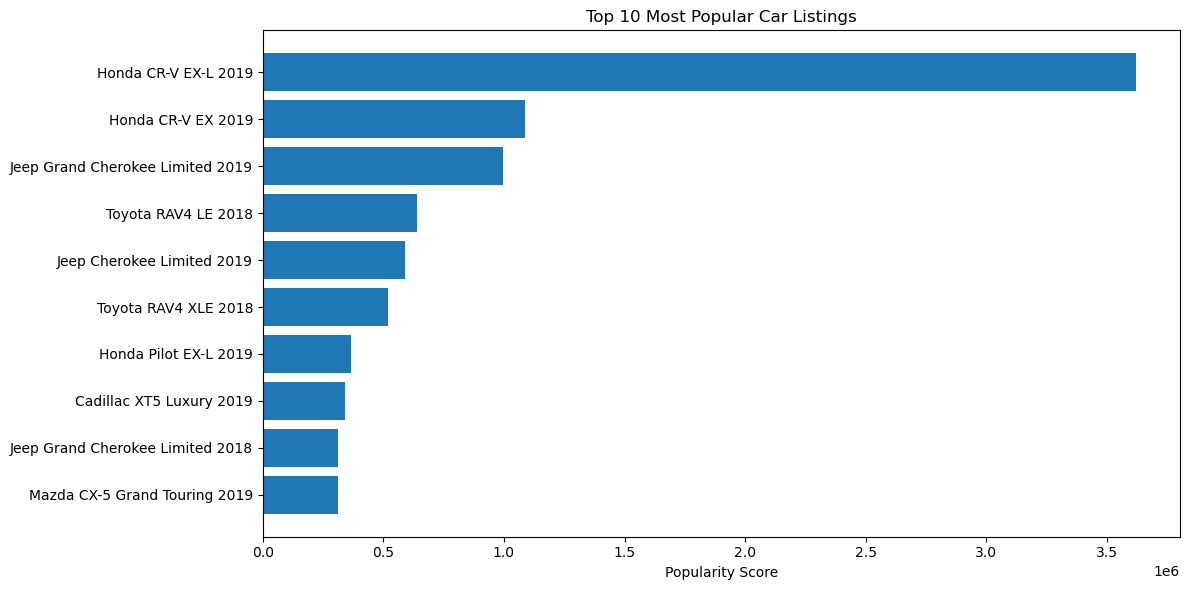

In [86]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv('Online_Cars_Sale_Marketplace.csv')

# 2. Remove duplicate VINs (keep first occurrence)
if 'VIN' in df.columns:
    df = df.drop_duplicates(subset='VIN', keep='first')

# 3. Fill missing consumer reviews and ratings with 0
df[['ConsumerReviews', 'ConsumerRating']] = df[['ConsumerReviews', 'ConsumerRating']].fillna(0)

# 4. Group the data by Make, Model, Year
group_cols = ['Make', 'Model', 'Year']

car_summary = df.groupby(group_cols).agg({
    'ConsumerReviews': 'sum',
    'ConsumerRating': 'mean'
}).reset_index()

# 5. Add number of listings manually
car_summary['Num_Listings'] = df.groupby(group_cols).size().values

# 6. Add square root of number of listings
car_summary['Sqrt_Listings'] = np.sqrt(car_summary['Num_Listings'])

# 7. Calculate the Popularity Score
car_summary['Popularity_Score'] = (
    car_summary['ConsumerReviews'] *
    car_summary['ConsumerRating'] *
    car_summary['Sqrt_Listings']
)

# 8. Rank cars based on popularity score
car_summary['Rank'] = car_summary['Popularity_Score'].rank(ascending=False, method='first')

# 9. Filter top 10 cars
top_10_cars = car_summary[car_summary['Rank'] <= 10].sort_values('Rank')

# 10. Display the Top 10
print(top_10_cars[['Rank', 'Make', 'Model', 'Year', 'Popularity_Score', 'ConsumerReviews', 'ConsumerRating', 'Num_Listings']])

# 11. Visualize the Top 10
plt.figure(figsize=(12,6))
plt.barh(top_10_cars['Make'] + ' ' + top_10_cars['Model'] + ' ' + top_10_cars['Year'].astype(str),
         top_10_cars['Popularity_Score'])
plt.xlabel('Popularity Score')
plt.title('Top 10 Most Popular Car Listings')
plt.gca().invert_yaxis()  # Highest rank at top
plt.tight_layout()
plt.show()


      Rank      Make                   Model  Year  Popularity_Score  \
957    1.0     Honda               CR-V EX-L  2019      3.622430e+06   
952    2.0     Honda                 CR-V EX  2019      1.086218e+06   
1236   3.0      Jeep  Grand Cherokee Limited  2019      9.955766e+05   
2284   4.0    Toyota                 RAV4 LE  2018      6.379322e+05   
1195   5.0      Jeep        Cherokee Limited  2019      5.880426e+05   
2300   6.0    Toyota                RAV4 XLE  2018      5.185344e+05   
1022   7.0     Honda              Pilot EX-L  2019      3.671472e+05   
451    8.0  Cadillac              XT5 Luxury  2019      3.388551e+05   
1235   9.0      Jeep  Grand Cherokee Limited  2018      3.115446e+05   
1616  10.0     Mazda      CX-5 Grand Touring  2019      3.112947e+05   

      ConsumerReviews  ConsumerRating  Num_Listings  
957             67500             4.8           125  
952             30240             4.8            56  
1236            21280             4.8        

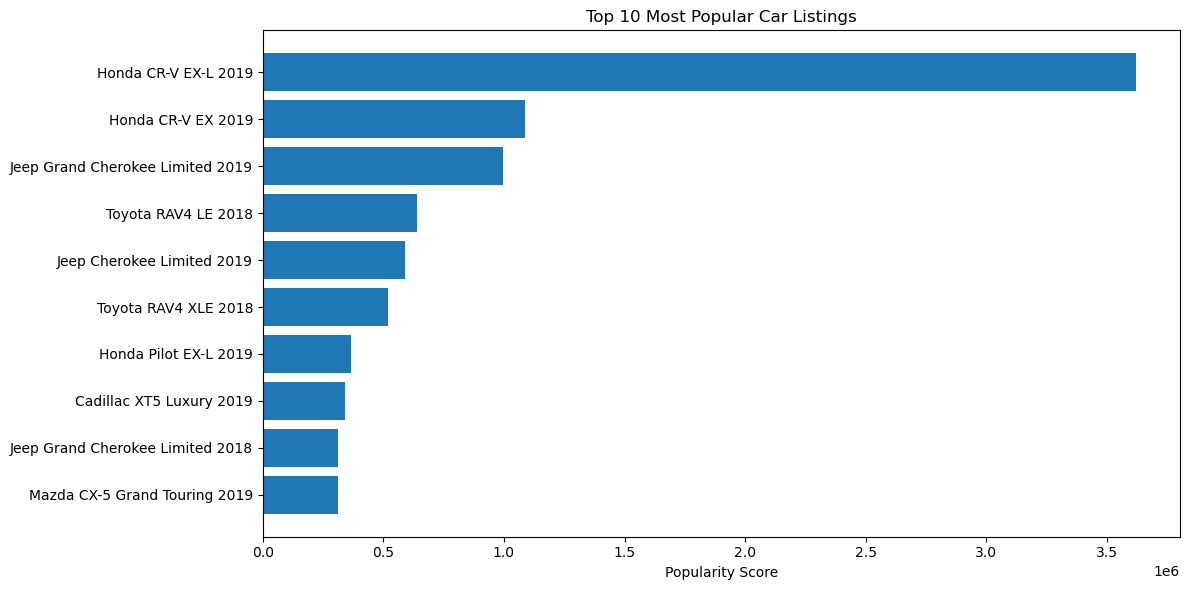

In [92]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv('Online_Cars_Sale_Marketplace.csv')

# 2. Remove duplicate VINs
if 'VIN' in df.columns:
    df = df.drop_duplicates(subset='VIN', keep='first')

# 3. Fill missing consumer reviews and ratings with 0
df[['ConsumerReviews', 'ConsumerRating']] = df[['ConsumerReviews', 'ConsumerRating']].fillna(0)

# 4. Group the data
group_cols = ['Make', 'Model', 'Year']

car_summary = df.groupby(group_cols).agg({
    'ConsumerReviews': 'sum',
    'ConsumerRating': 'mean'
}).reset_index()

# 5. Count the number of listings
car_summary['Num_Listings'] = df.groupby(group_cols).size().values

# 6. Calculate the Popularity Score directly
car_summary['Popularity_Score'] = car_summary['ConsumerReviews'] * car_summary['ConsumerRating'] * np.sqrt(car_summary['Num_Listings'])

# 7. Rank cars
car_summary['Rank'] = car_summary['Popularity_Score'].rank(ascending=False, method='first')

# 8. Filter top 10
top_10_cars = car_summary[car_summary['Rank'] <= 10].sort_values('Rank')

# 9. Display
print(top_10_cars[['Rank', 'Make', 'Model', 'Year', 'Popularity_Score', 'ConsumerReviews', 'ConsumerRating', 'Num_Listings']])

# 10. Visualize
plt.figure(figsize=(12,6))
plt.barh(top_10_cars['Make'] + ' ' + top_10_cars['Model'] + ' ' + top_10_cars['Year'].astype(str),
         top_10_cars['Popularity_Score'])
plt.xlabel('Popularity Score')
plt.title('Top 10 Most Popular Car Listings')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

